In [36]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [35]:
google_sheets_path = r'C:\Users\alsherman\Desktop\General_Assembly\Cluster Students (Responses) - Form Responses 1.csv'

In [37]:
# read google sheets data into a dataframe
# PANDAS: http://pandas.pydata.org/

df = pd.read_csv(google_sheets_path)

In [38]:
# set data to cluster
X = df.drop(['Timestamp','Email Address'], axis=1)

In [45]:
# test out a range of different clusters
# SCI-KIT LEARN: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  
k_range = range(4, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

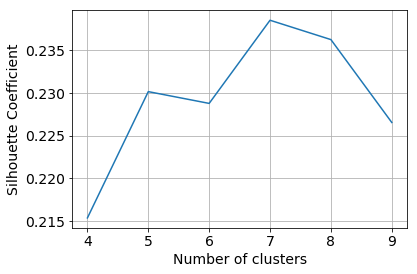

In [46]:
# plot the results of the different clusters
# SCI-KIT LEARN: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [47]:
km = KMeans(n_clusters=7, random_state=42)
km.fit(X)
df['cluster'] = km.labels_
df.cluster.value_counts()

1    6
0    5
3    4
5    3
6    2
4    2
2    2
Name: cluster, dtype: int64

In [44]:
df[['Email Address','cluster']].sort_values('cluster')

,Email Address,cluster
0,1,0
1,2,0
17,18,0
10,11,0
19,20,1
22,23,1
11,12,1
18,19,2
16,17,2
23,24,3
